# Lab 14 - LASSO
## Lecture 14

In [1]:
ted = readRDS('data/ted/ted_talks.rds')
tdm = ted[,grep("word",colnames(ted),value=TRUE)]
df = data.frame(views=ted$views,tdm)

In [2]:
library('glmnet')

Warning message:
"package 'glmnet' was built under R version 4.0.4"
Loading required package: Matrix

Loaded glmnet 4.1-1



In [ ]:
#install.packages('glmnetUtils')

In [3]:
library('glmnetUtils')

Warning message:
"package 'glmnetUtils' was built under R version 4.0.4"

Attaching package: 'glmnetUtils'


The following objects are masked from 'package:glmnet':

    cv.glmnet, glmnet




In [4]:
?glmnet

glmnet {glmnet},R Documentation
x,"input matrix, of dimension nobs x nvars; each row is an observation vector. Can be in sparse matrix format (inherit from class ""sparseMatrix"" as in package Matrix)"
y,"response variable. Quantitative for family=""gaussian"", or family=""poisson"" (non-negative counts). For family=""binomial"" should be either a factor with two levels, or a two-column matrix of counts or proportions (the second column is treated as the target class; for a factor, the last level in alphabetical order is the target class). For family=""multinomial"", can be a nc>=2 level factor, or a matrix with nc columns of counts or proportions. For either ""binomial"" or ""multinomial"", if y is presented as a vector, it will be coerced into a factor. For family=""cox"", preferably a Surv object from the survival package: see Details section for more information. For family=""mgaussian"", y is a matrix of quantitative responses."
family,"Either a character string representing one of the built-in families, or else a glm() family object. For more information, see Details section below or the documentation for response type (above)."
weights,observation weights. Can be total counts if responses are proportion matrices. Default is 1 for each observation
offset,"A vector of length nobs that is included in the linear predictor (a nobs x nc matrix for the ""multinomial"" family). Useful for the ""poisson"" family (e.g. log of exposure time), or for refining a model by starting at a current fit. Default is NULL. If supplied, then values must also be supplied to the predict function."
alpha,"The elasticnet mixing parameter, with 0≤α≤ 1. The penalty is defined as (1-α)/2||β||_2^2+α||β||_1. alpha=1 is the lasso penalty, and alpha=0 the ridge penalty."
nlambda,The number of lambda values - default is 100.
lambda.min.ratio,"Smallest value for lambda, as a fraction of lambda.max, the (data derived) entry value (i.e. the smallest value for which all coefficients are zero). The default depends on the sample size nobs relative to the number of variables nvars. If nobs > nvars, the default is 0.0001, close to zero. If nobs < nvars, the default is 0.01. A very small value of lambda.min.ratio will lead to a saturated fit in the nobs < nvars case. This is undefined for ""binomial"" and ""multinomial"" models, and glmnet will exit gracefully when the percentage deviance explained is almost 1."
lambda,"A user supplied lambda sequence. Typical usage is to have the program compute its own lambda sequence based on nlambda and lambda.min.ratio. Supplying a value of lambda overrides this. WARNING: use with care. Avoid supplying a single value for lambda (for predictions after CV use predict() instead). Supply instead a decreasing sequence of lambda values. glmnet relies on its warms starts for speed, and its often faster to fit a whole path than compute a single fit."
standardize,"Logical flag for x variable standardization, prior to fitting the model sequence. The coefficients are always returned on the original scale. Default is standardize=TRUE. If variables are in the same units already, you might not wish to standardize. See details below for y standardization with family=""gaussian""."


In [5]:
lasso.mod = glmnet(log(views)~.,family="gaussian",alpha=1,data=df)

In [7]:
length(lasso.mod$lambda)

[1] 81

In [6]:
lasso.mod$beta

   [[ suppressing 81 column names 's0', 's1', 's2' ... ]]



433 x 81 sparse Matrix of class "dgCMatrix"
                                                                         
wordfreq_children         . .          .           .           .         
wordfreq_creativity       . .          .           .           .         
wordfreq_culture          . .          .           .           .         
wordfreq_dance            . .          .           .           .         
wordfreq_education        . .          .           .           .         
wordfreq_parenting        . .          .           .           .         
wordfreq_teaching         . .          .           .           .         
wordfreq_alternative      . .          .           .           .         
wordfreq_cars             . .          .           .           .         
wordfreq_change           . .          .           .           .         
wordfreq_climate          . .          .           .           .         
wordfreq_energy           . .          .           .           .    

In [8]:
as.matrix(lasso.mod$beta)

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s71,s72,s73,s74,s75,s76,s77,s78,s79,s80
wordfreq_children,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,...,-0.06382029,-0.06388744,-0.06392854,-0.06398105,-0.06402743,-0.06405338,-0.06408693,-0.06412286,-0.06415276,-0.06419103
wordfreq_creativity,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,...,0.12301612,0.12309856,0.12318482,0.12324307,0.12332032,0.12338204,0.12342767,0.12348035,0.12353079,0.12355184
wordfreq_culture,0,0,0,0,0.00000000,0.00000000,0.00622005,0.02411992,0.039859518,0.05354687,...,0.16964418,0.16971868,0.16980726,0.16984997,0.16993077,0.16998960,0.17002580,0.17007488,0.17012283,0.17014035
wordfreq_dance,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,...,0.25850017,0.25874322,0.25905318,0.25922245,0.25946836,0.25968432,0.25983440,0.25999106,0.26014450,0.26023985
wordfreq_education,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.002687577,0.02656175,...,0.17786136,0.17783632,0.17778516,0.17778758,0.17773826,0.17770665,0.17769794,0.17767466,0.17764938,0.17765532
wordfreq_parenting,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,...,-0.02326644,-0.02354404,-0.02382776,-0.02402049,-0.02428344,-0.02448549,-0.02464197,-0.02481278,-0.02497361,-0.02507384
wordfreq_teaching,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,...,0.15678788,0.15697106,0.15710030,0.15726375,0.15738215,0.15748215,0.15759915,0.15769984,0.15778627,0.15788723
wordfreq_alternative,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,...,-0.28514547,-0.28728114,-0.28984995,-0.29136065,-0.29341134,-0.29531524,-0.29669264,-0.29807495,-0.29942186,-0.30030947
wordfreq_cars,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,...,0.04977168,0.04996720,0.05018408,0.05032834,0.05051775,0.05067278,0.05079993,0.05093102,0.05105465,0.05118941
wordfreq_change,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,...,-0.26695106,-0.26883198,-0.27121047,-0.27251719,-0.27435638,-0.27612157,-0.27736222,-0.27860245,-0.27982525,-0.28059183


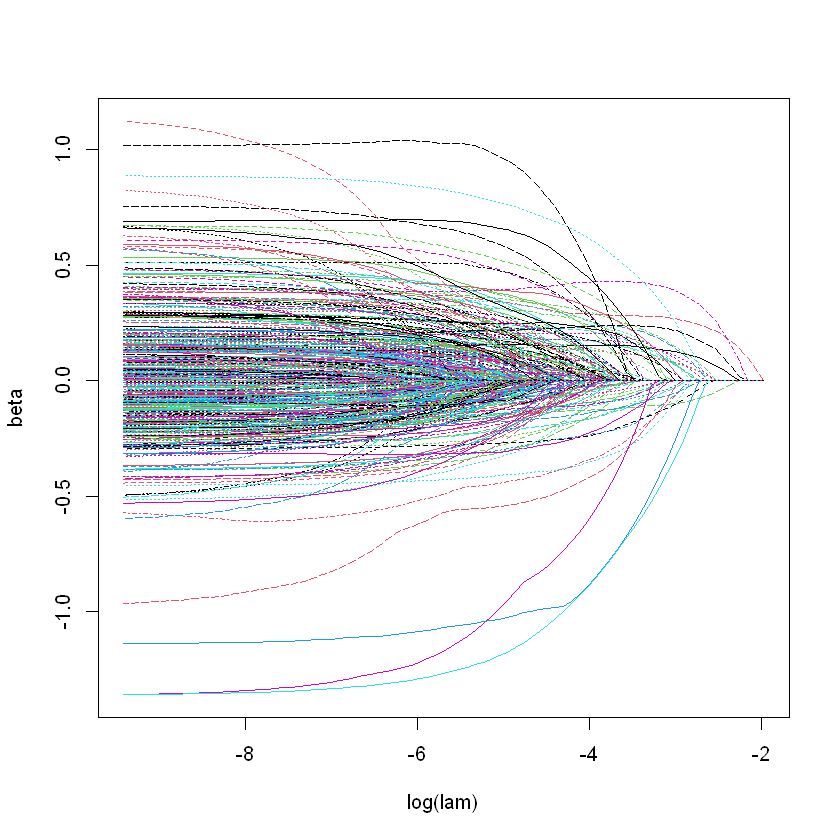

In [9]:
matplot(log(lasso.mod$lambda),t(as.matrix(lasso.mod$beta)),type='l',xlab="log(lam)",ylab="beta")

In [10]:
ridge.mod = glmnet(log(views)~.,family="gaussian",alpha=0,data=df)

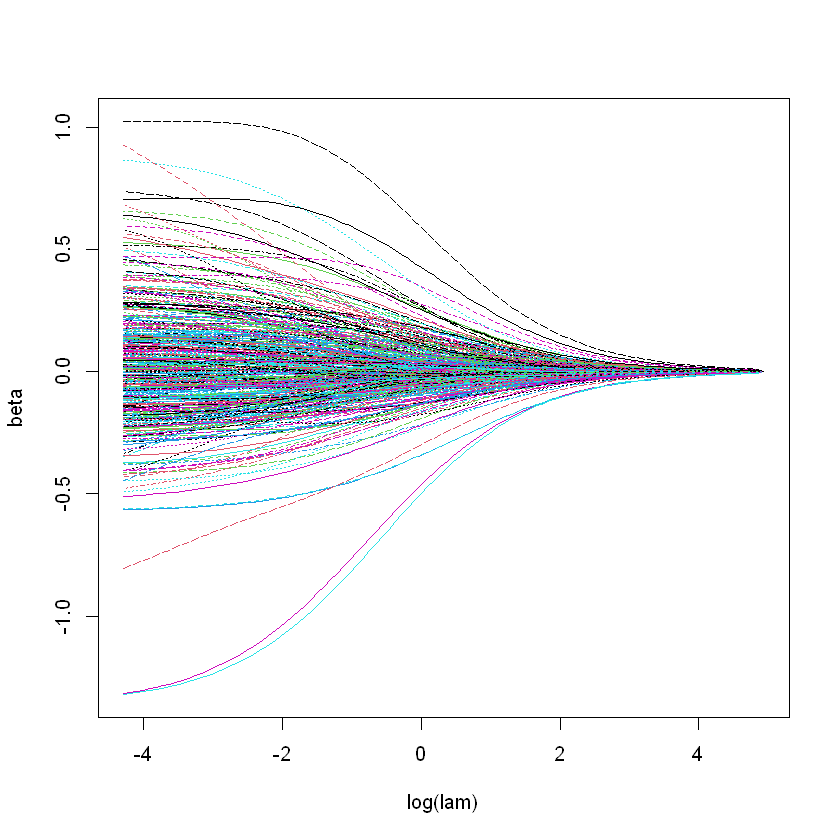

In [11]:
matplot(log(ridge.mod$lambda),t(as.matrix(ridge.mod$beta)),type='l',xlab="log(lam)",ylab="beta")

In [17]:
lamb_seq=10^seq(-5,0,length.out=100)
lamb_seq

[1] 1.000000e-05 1.123324e-05 1.261857e-05 1.417474e-05 1.592283e-05
  [6] 1.788650e-05 2.009233e-05 2.257020e-05 2.535364e-05 2.848036e-05
 [11] 3.199267e-05 3.593814e-05 4.037017e-05 4.534879e-05 5.094138e-05
 [16] 5.722368e-05 6.428073e-05 7.220809e-05 8.111308e-05 9.111628e-05
 [21] 1.023531e-04 1.149757e-04 1.291550e-04 1.450829e-04 1.629751e-04
 [26] 1.830738e-04 2.056512e-04 2.310130e-04 2.595024e-04 2.915053e-04
 [31] 3.274549e-04 3.678380e-04 4.132012e-04 4.641589e-04 5.214008e-04
 [36] 5.857021e-04 6.579332e-04 7.390722e-04 8.302176e-04 9.326033e-04
 [41] 1.047616e-03 1.176812e-03 1.321941e-03 1.484968e-03 1.668101e-03
 [46] 1.873817e-03 2.104904e-03 2.364489e-03 2.656088e-03 2.983647e-03
 [51] 3.351603e-03 3.764936e-03 4.229243e-03 4.750810e-03 5.336699e-03
 [56] 5.994843e-03 6.734151e-03 7.564633e-03 8.497534e-03 9.545485e-03
 [61] 1.072267e-02 1.204504e-02 1.353048e-02 1.519911e-02 1.707353e-02
 [66] 1.917910e-02 2.154435e-02 2.420128e-02 2.718588e-02 3.053856e-02
 [71] 3.430469e-02 3.853529e-02 4.328761e-02 4.862602e-02 5.462277e-02
 [76] 6.135907e-02 6.892612e-02 7.742637e-02 8.697490e-02 9.770100e-02
 [81] 1.097499e-01 1.232847e-01 1.384886e-01 1.555676e-01 1.747528e-01
 [86] 1.963041e-01 2.205131e-01 2.477076e-01 2.782559e-01 3.125716e-01
 [91] 3.511192e-01 3.944206e-01 4.430621e-01 4.977024e-01 5.590810e-01
 [96] 6.280291e-01 7.054802e-01 7.924829e-01 8.902151e-01 1.000000e+00

In [18]:
lasso.cv = cv.glmnet(log(views)~.,family="gaussian",alpha=1,data=df,lambda=lamb_seq)

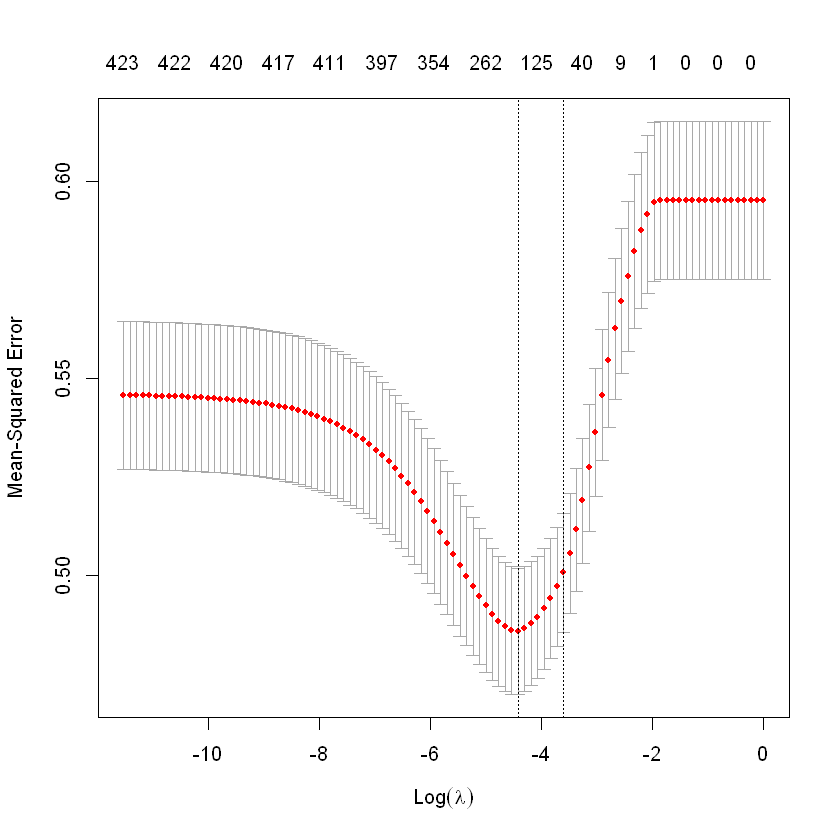

In [19]:
plot(lasso.cv)

In [20]:
best_lam = lasso.cv$lambda.min
best_lam

[1] 0.01204504

In [21]:
best.lasso = glmnet(log(views)~.,family="gaussian",alpha=1,data=df,lambda=best_lam)

In [22]:
dim(best.lasso$beta)

[1] 433   1

In [23]:
best.lasso$beta

433 x 1 sparse Matrix of class "dgCMatrix"
                                     s0
wordfreq_children          .           
wordfreq_creativity        8.182518e-02
wordfreq_culture           1.387273e-01
wordfreq_dance             1.662035e-01
wordfreq_education         1.799053e-01
wordfreq_parenting         .           
wordfreq_teaching          3.720702e-02
wordfreq_alternative       .           
wordfreq_cars              .           
wordfreq_change           -2.995519e-02
wordfreq_climate           .           
wordfreq_energy            .           
wordfreq_environment       .           
wordfreq_global            .           
wordfreq_issues           -1.353184e-01
wordfreq_science          -1.040472e-03
wordfreq_sustainability    .           
wordfreq_technology       -7.174183e-02
wordfreq_computers         .           
wordfreq_design           -7.353808e-02
wordfreq_entertainment     .           
wordfreq_interface         8.406456e-02
wordfreq_media            -3.917788e-

In [24]:
sum(best.lasso$beta!=0)

[1] 169

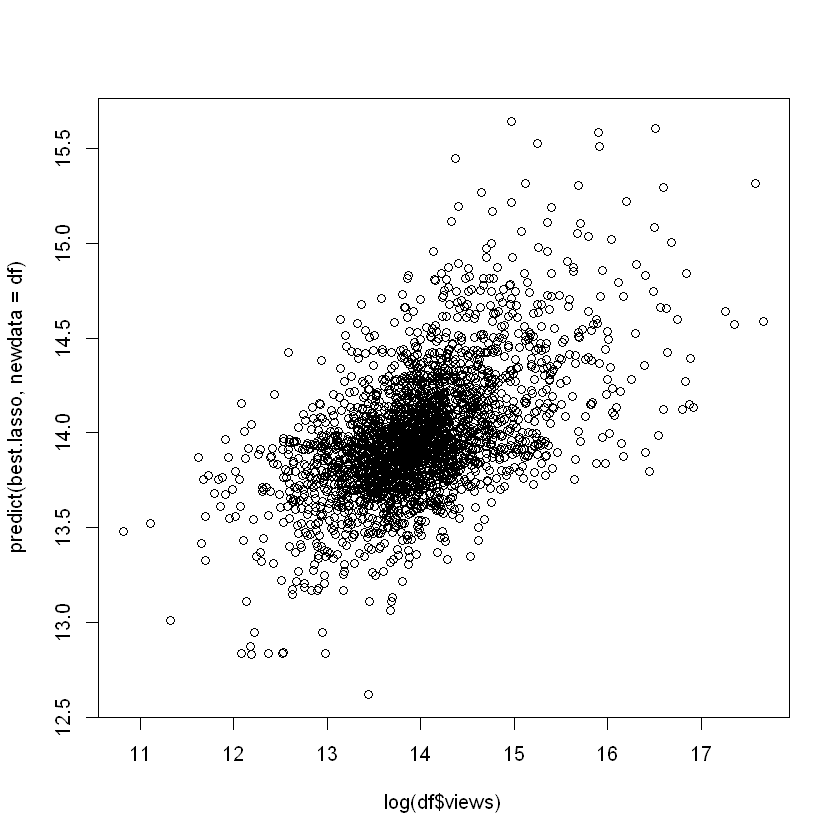

In [29]:
plot(log(df$views),predict(best.lasso,newdata=df))

# elastic net

In [46]:
en.mod = glmnet(log(views)~.,family="gaussian",alpha=.5,data=df)

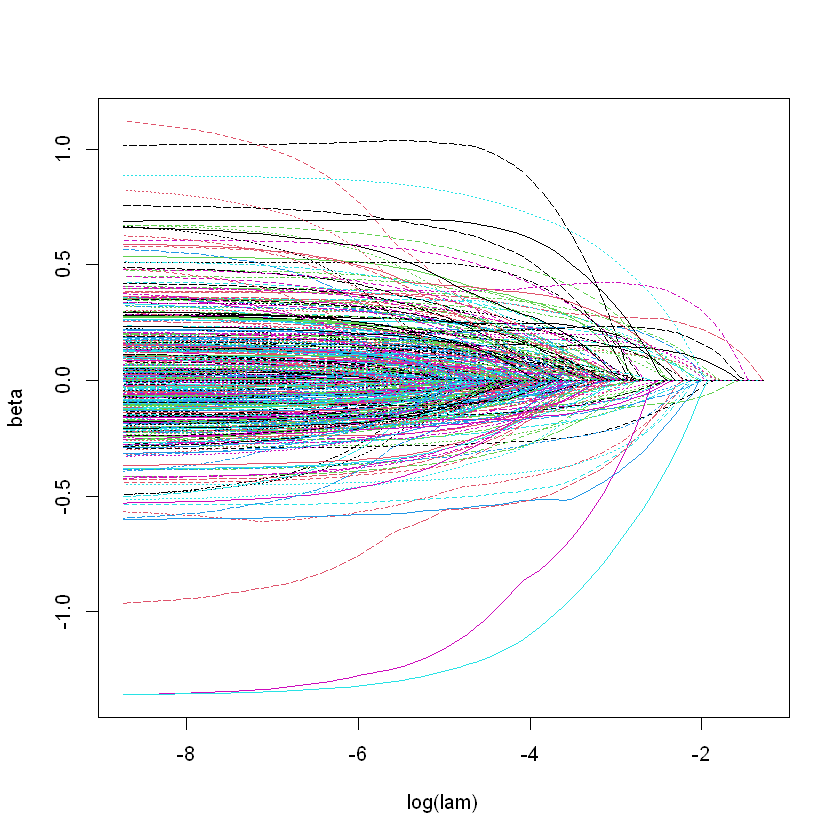

In [47]:
matplot(log(en.mod$lambda),t(as.matrix(en.mod$beta)),type='l',xlab="log(lam)",ylab="beta")

In [45]:
en.mod$beta

   [[ suppressing 100 column names 's0', 's1', 's2' ... ]]



433 x 100 sparse Matrix of class "dgCMatrix"
                                                                               
wordfreq_children         . .           .            .             .           
wordfreq_creativity       . .           .            .             .           
wordfreq_culture          . .           .            .             .           
wordfreq_dance            . .           .            .             .           
wordfreq_education        . .           .            .             .           
wordfreq_parenting        . .           .            .             .           
wordfreq_teaching         . .           .            .             .           
wordfreq_alternative      . .           .            .             .           
wordfreq_cars             . .           .            .             .           
wordfreq_change           . .           .            .             .           
wordfreq_climate          . .           .            .             .       